## Introducción

La detección de fraude en transacciones financieras es un desafío crítico para empresas de tecnología, bancos y plataformas de pago. Con el aumento del comercio digital, las actividades fraudulentas han evolucionado, haciendo necesaria la implementación de sistemas de Machine Learning para identificar patrones anómalos en tiempo real.

Este proyecto tiene como objetivo desarrollar un modelo de detección de fraude basado en aprendizaje automático, utilizando un conjunto de datos sintético que simula transacciones reales. Este dataset contiene información relevante, como el historial de transacciones del usuario, puntuaciones de riesgo, número de intentos fallidos y otros factores clave que pueden ayudar a distinguir entre transacciones legítimas y fraudulentas.

El enfoque utilizado incluye preprocesamiento de datos, selección de características, transformación de variables y evaluación de modelos supervisados para determinar la mejor estrategia en la identificación de fraudes.



## Objetivos del Proyecto
🔹 Desarrollar un modelo de Machine Learning que identifique transacciones

fraudulentas con alta precisión.

🔹 Evaluar distintos algoritmos de clasificación, incluyendo Regresión Logística, Árboles de Decisión y Bosque Aleatorio.

🔹 Optimizar el rendimiento del modelo mediante la selección de características y técnicas de preprocesamiento.

🔹 Reducir el impacto de falsos positivos, asegurando que las transacciones legítimas no sean bloqueadas erróneamente.

🔹 Proporcionar recomendaciones para la implementación de la solución en un entorno de producción.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [5]:
df =pd.read_csv("datasets/synthetic_fraud_dataset.csv")

In [6]:
pd.set_option('display.max_columns', None) #para mostrar todas las columnas del dataframe

In [7]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [9]:
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [12]:
df.select_dtypes(include=['object']).describe()


,Transaction_ID,User_ID,Transaction_Type,Timestamp,Device_Type,Location,Merchant_Category,Card_Type,Authentication_Method
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,50000,8963,4,47724,3,5,5,4,4
top,TXN_33553,USER_6599,POS,2023-06-04 06:35:00,Tablet,Tokyo,Clothing,Mastercard,Biometric
freq,1,16,12549,4,16779,10208,10033,12693,12591


C:\Users\juan6\AppData\Local\Temp\ipykernel_23404\2609277463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Fraud_Label"], palette='viridis')


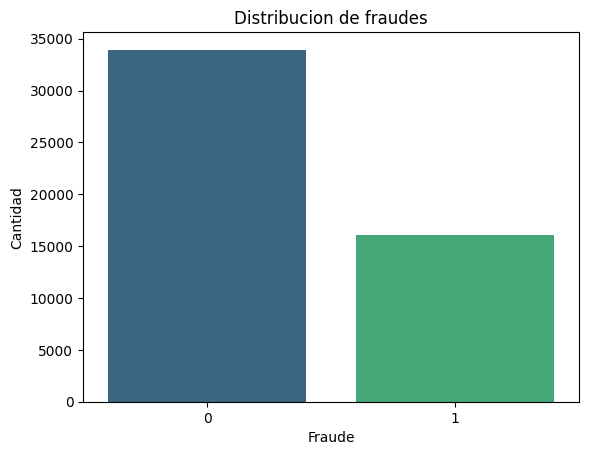


Fraud_Label
0    67.866
1    32.134
Name: proportion, dtype: float64


In [13]:
sns.countplot(x = df["Fraud_Label"], palette='viridis')
plt.xlabel("Fraude")
plt.ylabel("Cantidad")
plt.title("Distribucion de fraudes")
plt.show()
print()
print(df["Fraud_Label"].value_counts(normalize=True)*100) #sacamos la proporcion

Aqui vemos que la proporcion de los que son fraudes son alredor del 30%, y los que no son fraudes alrededor de 67%, claramente la clase esta desbalanceada.

C:\Users\juan6\AppData\Local\Temp\ipykernel_23404\1991130303.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(["Sin antecedente", "Con antecedente"])  # Etiquetas personalizadas
C:\Users\juan6\AppData\Local\Temp\ipykernel_23404\1991130303.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,0].set_xticklabels(["Primeros días", "Find e semana"])


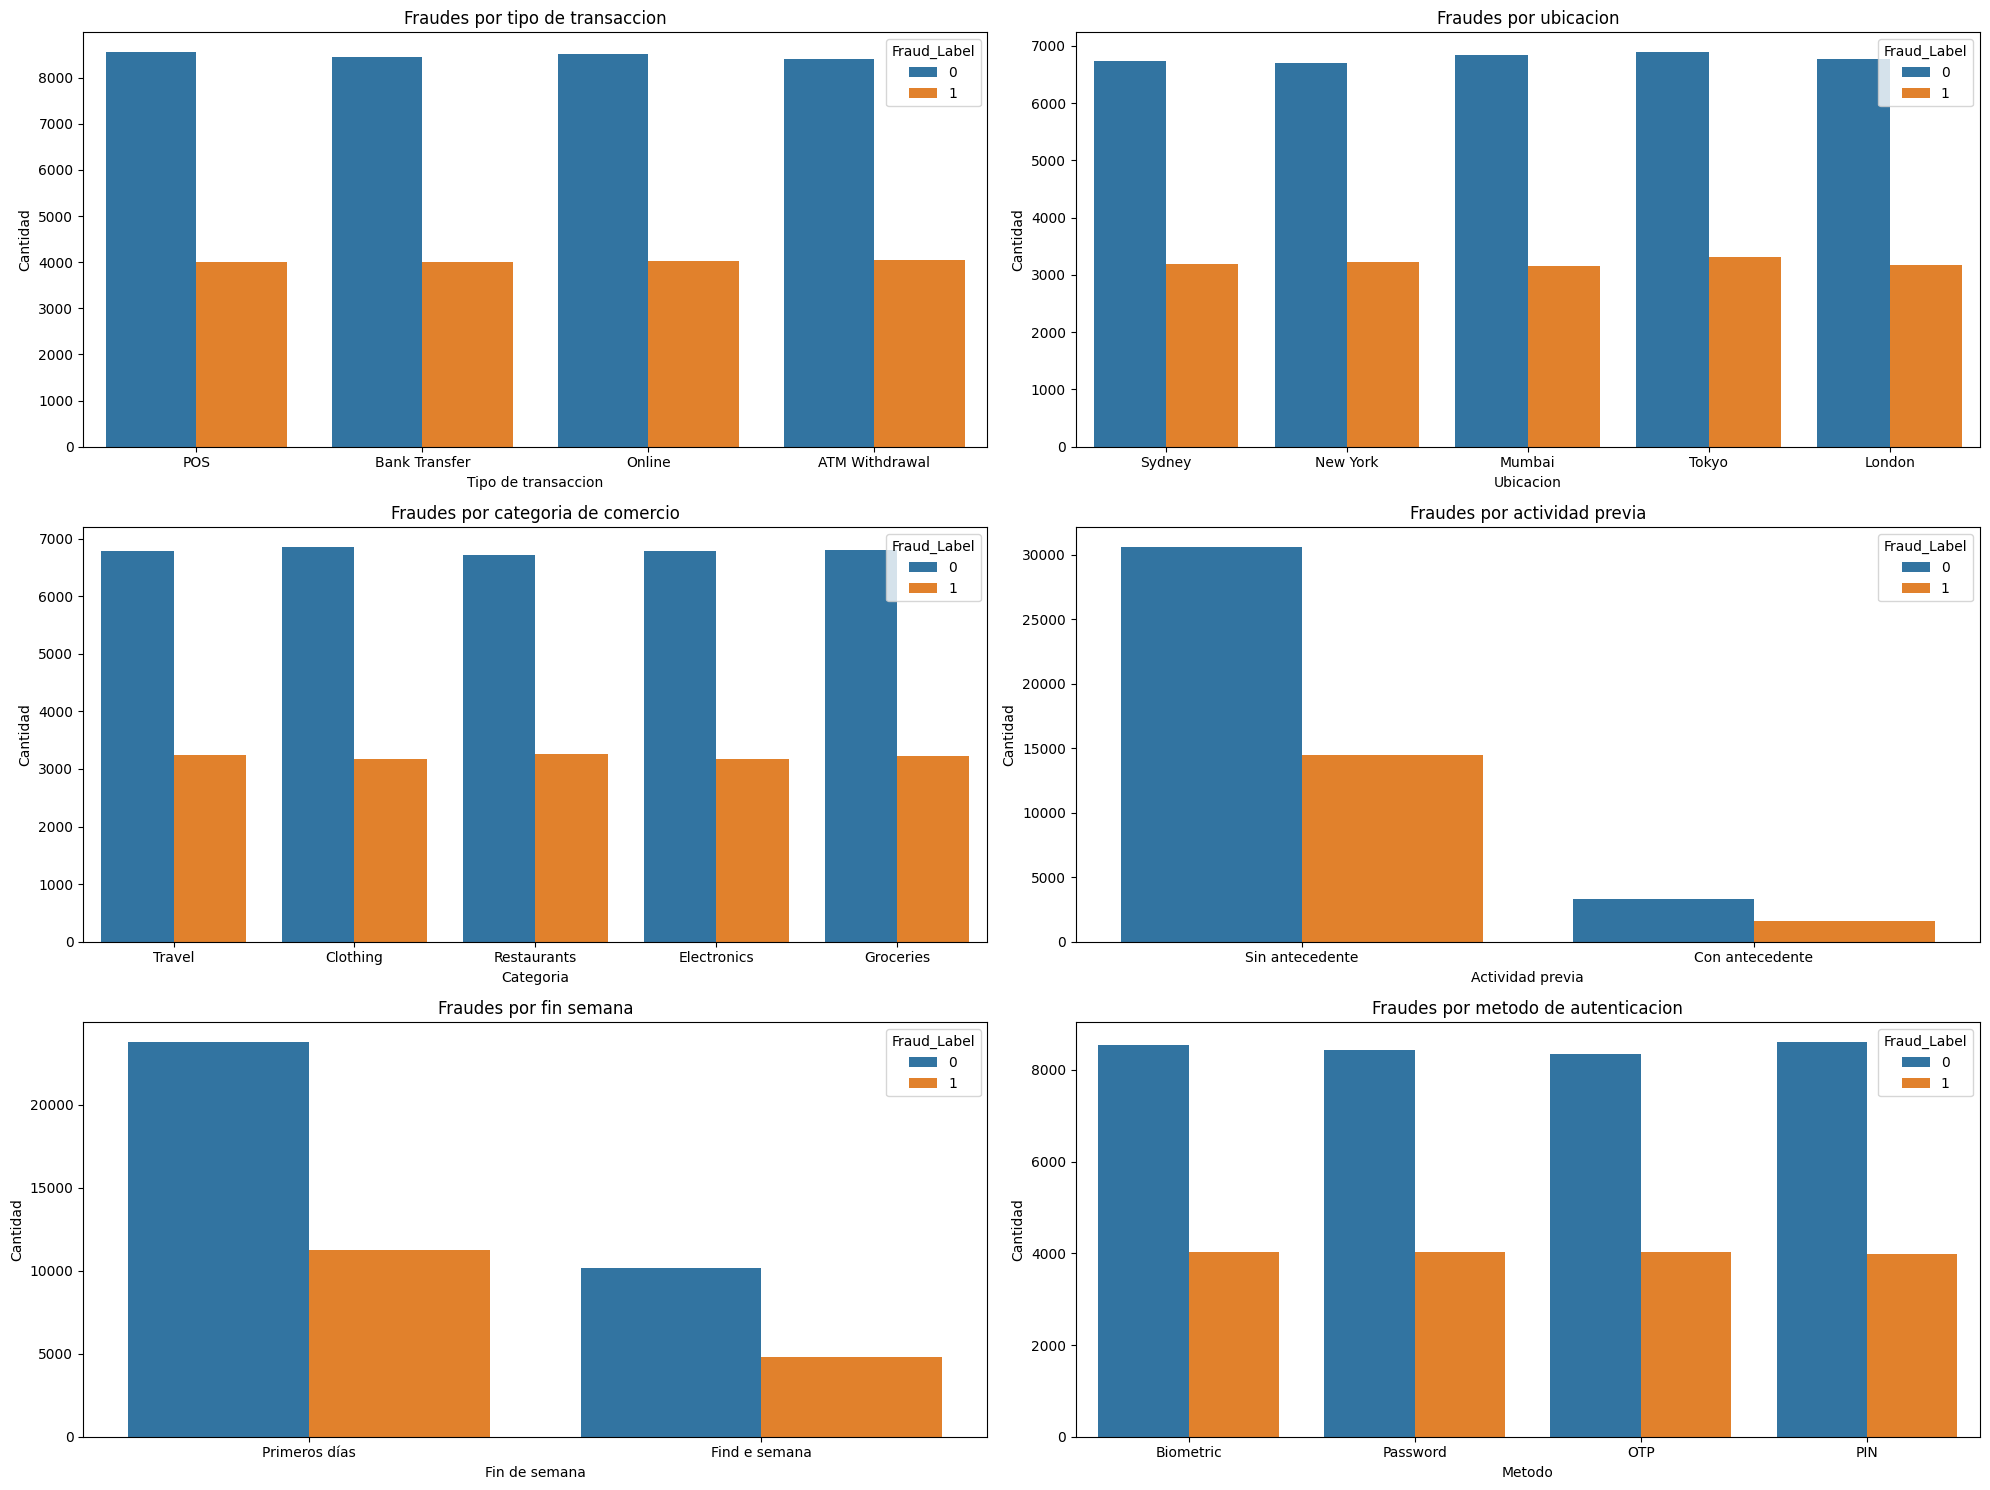

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
sns.countplot(x = df["Transaction_Type"], hue="Fraud_Label", data=df, ax= axes[0,0])
axes[0,0].set_title("Fraudes por tipo de transaccion")
axes[0,0].set_xlabel("Tipo de transaccion")
axes[0,0].set_ylabel("Cantidad")

sns.countplot(x = df["Location"], hue="Fraud_Label", data=df, ax= axes[0,1])
axes[0,1].set_title("Fraudes por ubicacion")
axes[0,1].set_xlabel("Ubicacion")
axes[0,1].set_ylabel("Cantidad")

sns.countplot(x = df["Merchant_Category"], hue="Fraud_Label", data=df, ax= axes[1,0])
axes[1,0].set_title("Fraudes por categoria de comercio")
axes[1,0].set_xlabel("Categoria")
axes[1,0].set_ylabel("Cantidad")

sns.countplot(x = df["Previous_Fraudulent_Activity"], hue="Fraud_Label", data=df, ax= axes[1,1])
axes[1,1].set_title("Fraudes por actividad previa")
axes[1,1].set_xlabel("Actividad previa")
axes[1,1].set_ylabel("Cantidad")
axes[1,1].set_xticklabels(["Sin antecedente", "Con antecedente"])  # Etiquetas personalizadas

sns.countplot(x = df["Is_Weekend"], hue="Fraud_Label", data=df, ax= axes[2,0])
axes[2,0].set_title("Fraudes por fin semana")
axes[2,0].set_xlabel("Fin de semana")
axes[2,0].set_ylabel("Cantidad")
axes[2,0].set_xticklabels(["Primeros días", "Find e semana"])

sns.countplot(x = df["Authentication_Method"], hue="Fraud_Label", data=df, ax= axes[2,1])
axes[2,1].set_title("Fraudes por metodo de autenticacion")
axes[2,1].set_xlabel("Metodo")
axes[2,1].set_ylabel("Cantidad")

plt.tight_layout()

plt.show()


En cuanto tipos de transaccion y ubicacion, en todos hay fraudes y casi siempre en la misma proporcion, lo mismo se observa en categoria de comercios, en cuanto a personas con y sin antecedentes se ve que la relacion es parecida, podemos decir que en personas sin antecedentes y que realizan transacciones los primeros dias de la semana hay mas operaciones fraudulentas, pero esto tambien es consecuencia de mayores cantidad de operaciones en estas secciones

C:\Users\juan6\AppData\Local\Temp\ipykernel_23404\3784787102.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No Fraude", "Fraude"])


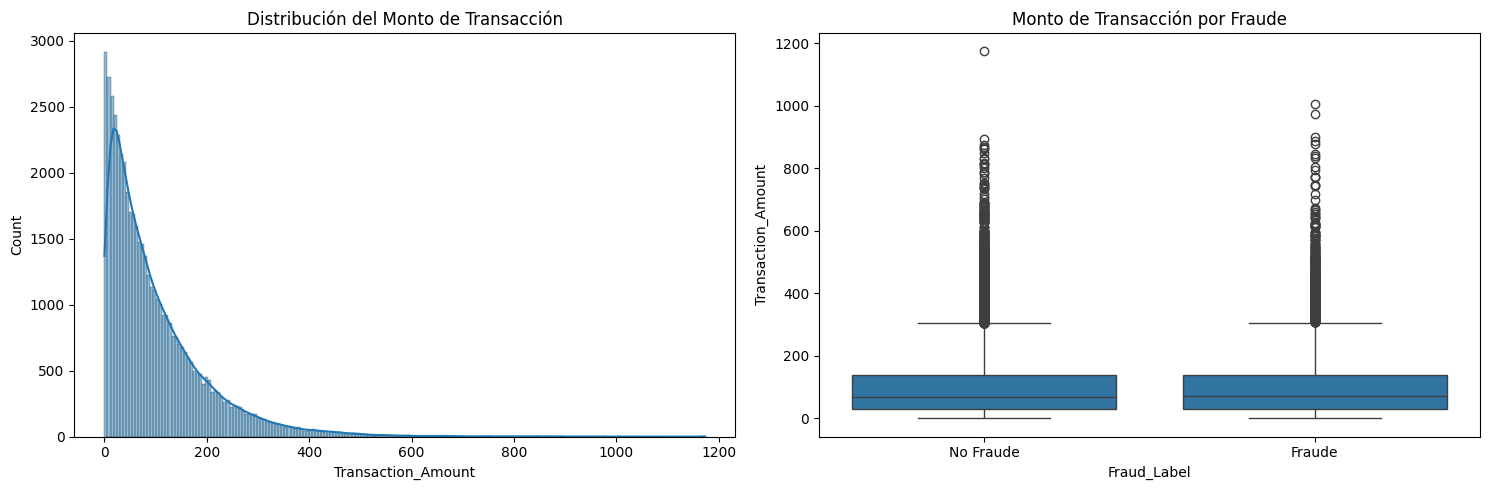

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma del monto de transacción
sns.histplot(df['Transaction_Amount'], ax=axes[0], kde=True)
axes[0].set_title('Distribución del Monto de Transacción')

# Boxplot del monto de transacción por fraude
sns.boxplot(x='Fraud_Label', y='Transaction_Amount', data=df, ax=axes[1])
axes[1].set_title('Monto de Transacción por Fraude')
axes[1].set_xticklabels(["No Fraude", "Fraude"])

plt.tight_layout()
plt.show()

Vemos en la distribucion un claro sesgo a la derecha, por lo que nos dice que hay valores atipicos altos, la mayoria hace transacciones de bajo monto, en cuantoa  la media de transacciones con y sin fraudes son parecidas y en ambas secciones se tienen valores atipicos correspondientes a transacciones altas, eso nos diria que si bien no son en gran cantidad las transacciones altas son indistintas tanto para transacciones con y sin fraude.

C:\Users\juan6\AppData\Local\Temp\ipykernel_23404\2056417491.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No Fraude", "Fraude"])


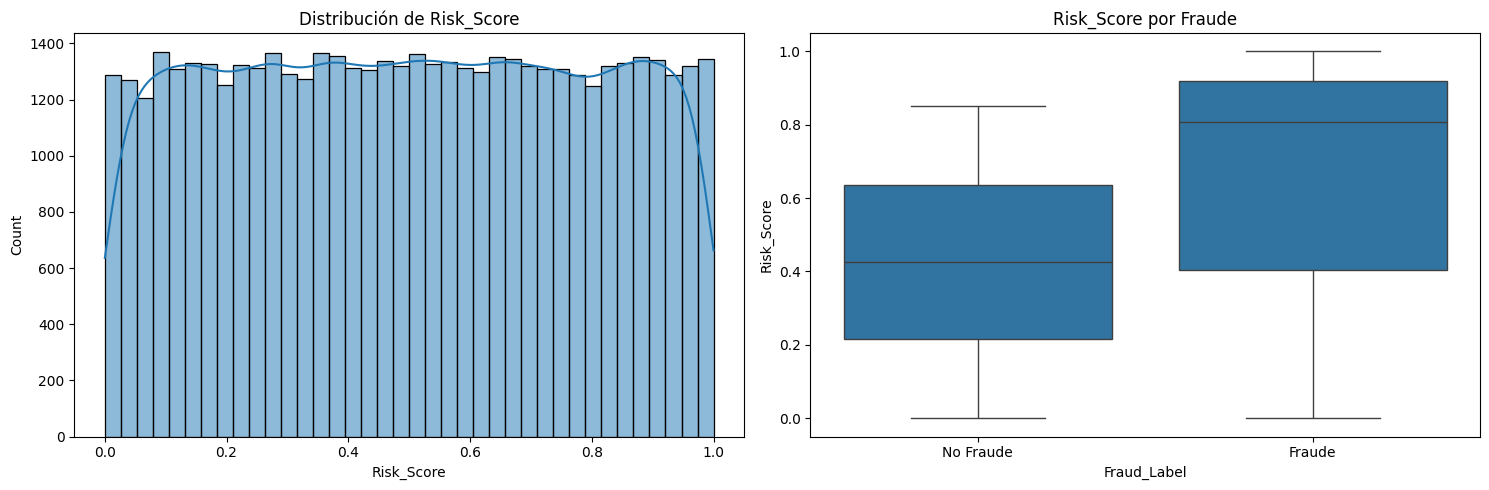

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de Risk_Score
sns.histplot(df['Risk_Score'], ax=axes[0], kde=True)
axes[0].set_title('Distribución de Risk_Score')

# Boxplot de Risk_Score por Fraude
sns.boxplot(x='Fraud_Label', y='Risk_Score', data=df, ax=axes[1])
axes[1].set_title('Risk_Score por Fraude')
axes[1].set_xticklabels(["No Fraude", "Fraude"])

plt.tight_layout()
plt.show()

Como vemos la distribucion de Risk_Score es uniforme y esperariamos q sea un sego a la derecha pues la mayoria de datos terminan siendo no fraudulentos y se concentrarian con valores cercanos a 0, y en el grafico de cajas vemos que las trasacciones fraudulentas como las que no son fraudulentas, se superponen con las puntuaciones de Risk_Score, por lo que nos dice q non distinguen bien de transacciones fraudulentas de las que no lo son.



C:\Users\juan6\AppData\Local\Temp\ipykernel_23404\4148757726.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Fraude', 'Fraude'])


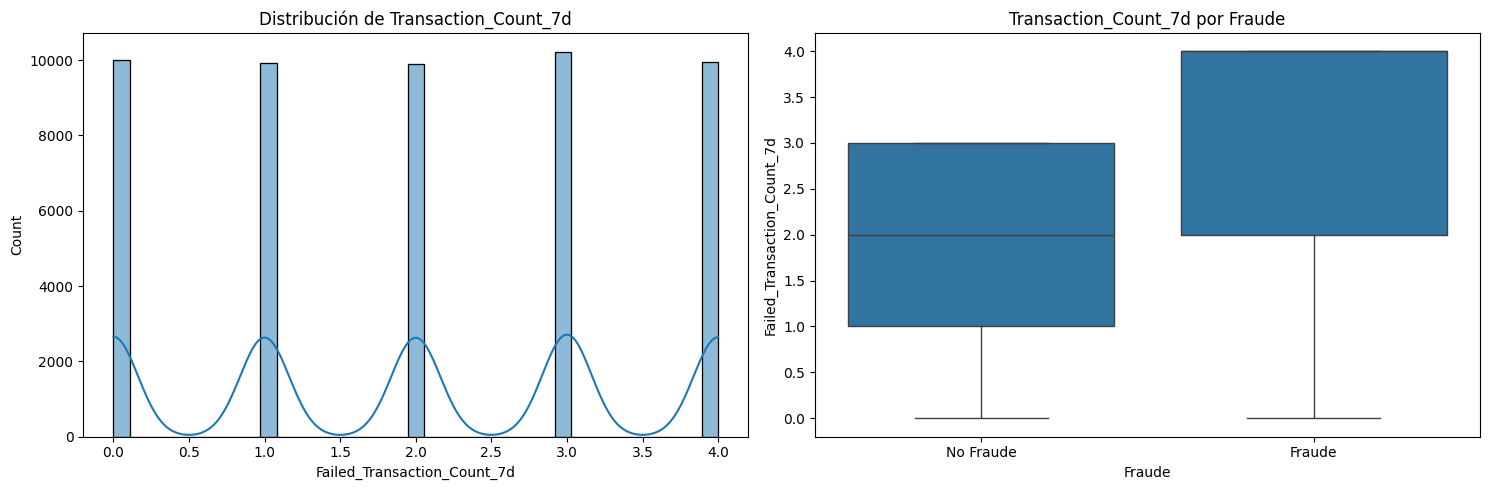

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df['Failed_Transaction_Count_7d'], ax=axes[0], kde=True)
axes[0].set_title('Distribución de Transaction_Count_7d')

sns.boxplot(x='Fraud_Label', y='Failed_Transaction_Count_7d', data=df, ax=axes[1])
axes[1].set_title('Transaction_Count_7d por Fraude')
axes[1].set_xlabel('Fraude')
axes[1].set_xticklabels(['No Fraude', 'Fraude'])

plt.tight_layout()
plt.show()

"El número de transacciones fallidas (Failed_Transaction_Count_7d) sigue una distribución cercana a la uniforme, con frecuencias similares en los valores discretos de 0 a 4. Sin embargo, al analizar el gráfico de cajas por categoría de fraude, observamos que los casos de fraude tienden a concentrarse en valores más altos, cercanos a 4. Esto indica que, aunque la distribución general parece uniforme, cuando segmentamos por fraude, la distribución deja de ser uniforme y muestra un sesgo hacia valores más altos.

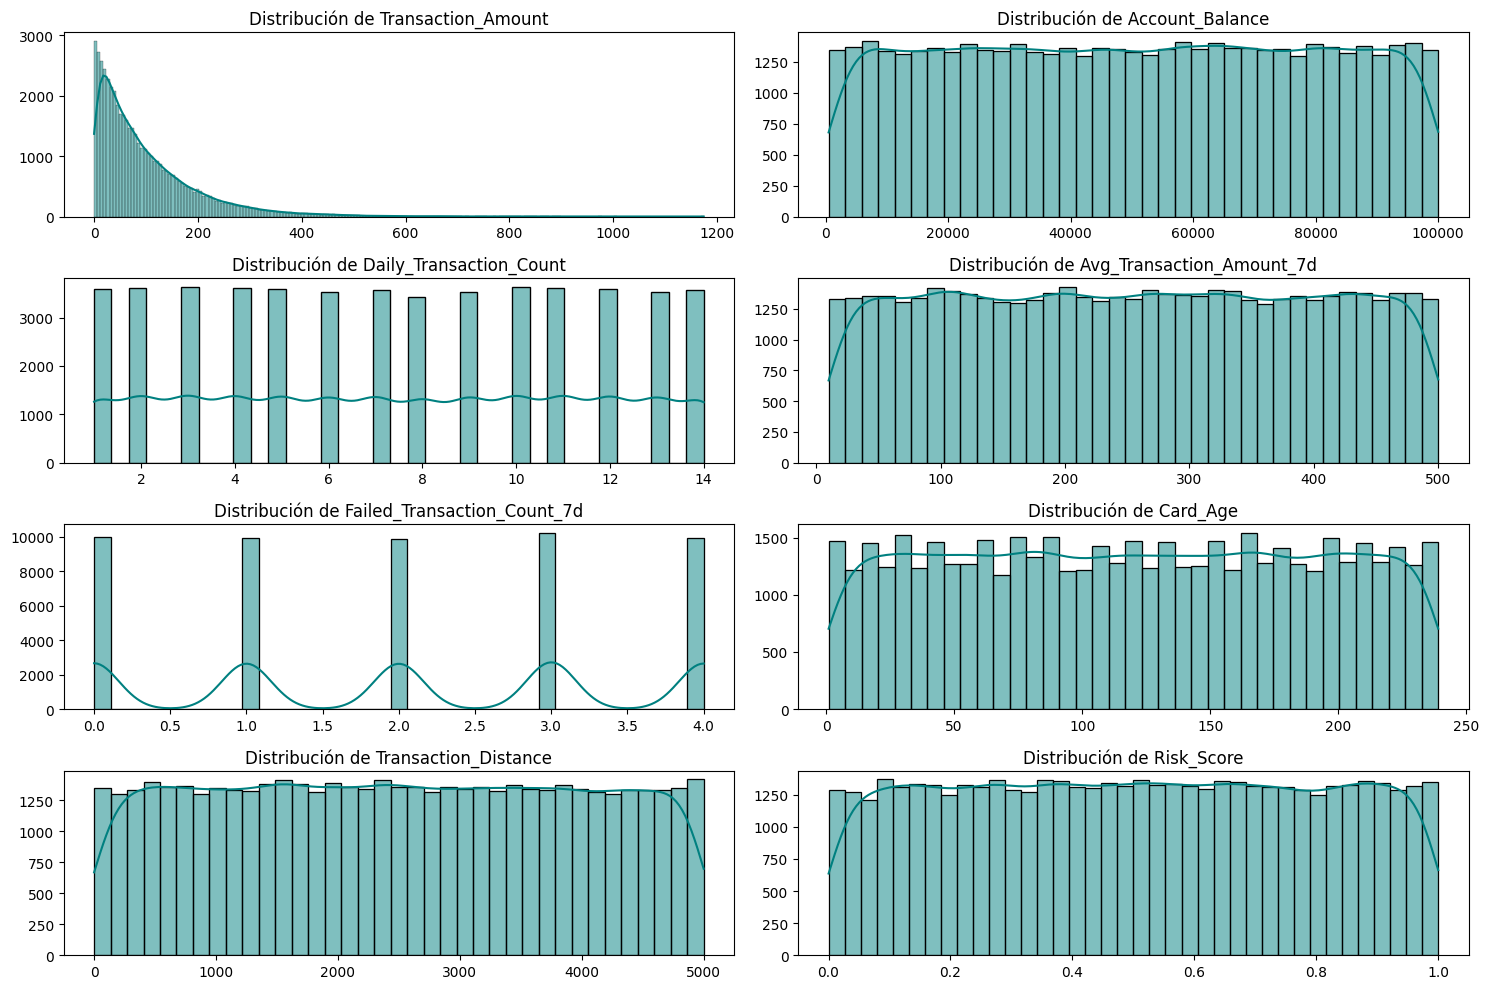

In [18]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])
# Seleccionar solo las columnas numéricas NO binarias
numeric_continuous = [col for col in numeric_df.columns if numeric_df[col].nunique() > 2]
# Crear figura con 4 filas y 3 columnas (ajustar según número de columnas)
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()  # Aplanar matriz de subgráficos a un array 1D

# Iterar sobre las columnas numéricas continuas y graficarlas
for i, col in enumerate(numeric_continuous):
    sns.histplot(x=numeric_df[col], kde=True, ax=axes[i], color="teal")
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Ajustar diseño para evitar solapamiento
plt.tight_layout()
plt.show()

Observamos que tiene distribucion uniforme, y vemos sesgo hacia la derecha en "Transaction_Amount", lo que sera un obstaculo en modelos de regresion.

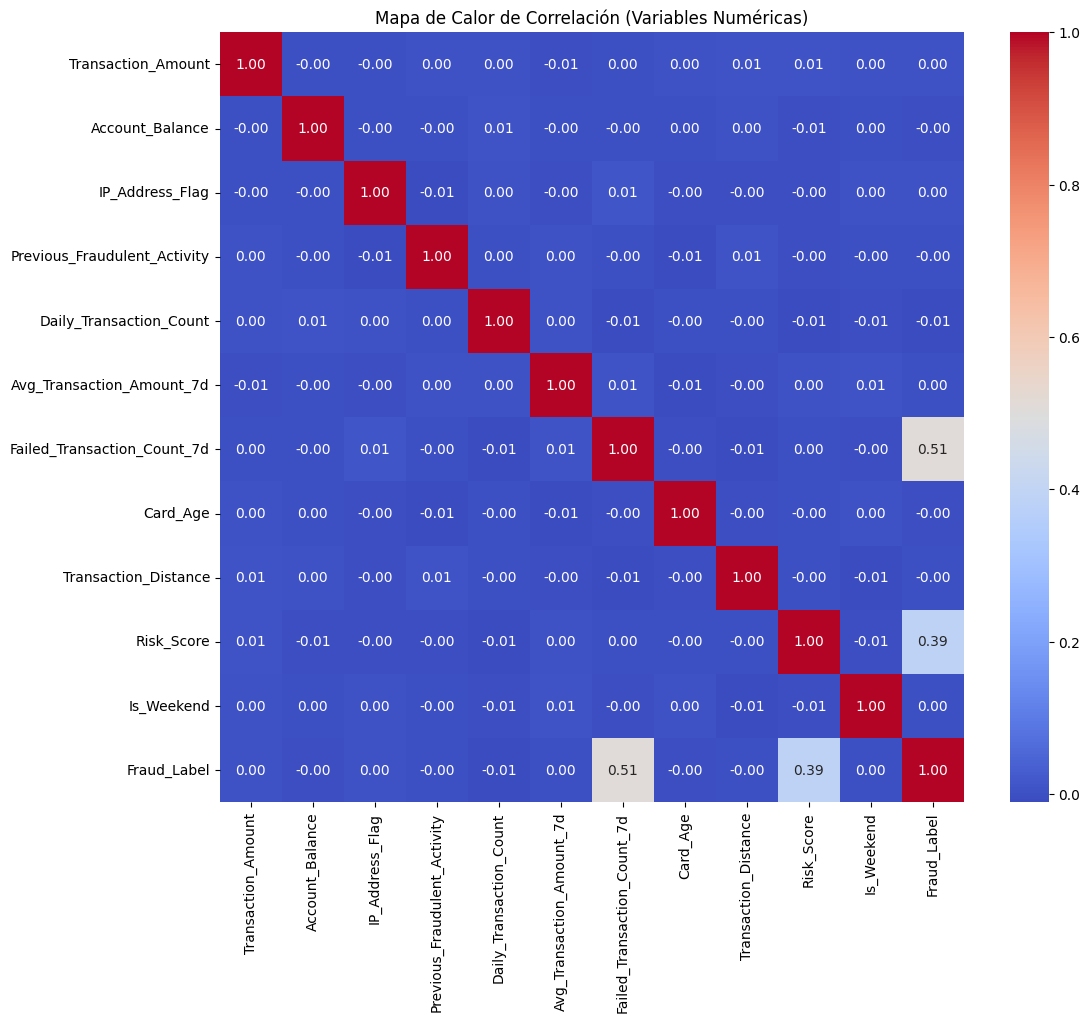

In [19]:
# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación (Variables Numéricas)')
plt.show()


El mapa de calor muestra una correlación positiva moderada entre Fraud_Label y Failed_Transaction_Count_7d (0.51), así como Risk_Score (0.39). Estas variables podrían ser relevantes en un modelo de regresión logística, ya que la regresión logística funciona bien cuando hay relaciones lineales entre las variables predictoras y la variable objetivo.

Sin embargo, el resto de las variables presentan correlaciones cercanas a 0, lo que indica una baja relación lineal con el fraude. Esto sugiere que un modelo más flexible, como árboles de decisión o random forest, podría capturar mejor patrones no lineales y combinaciones de múltiples variables para mejorar la predicción del fraude.

## Transformacion de datos

In [20]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"]) # Convertimos al tipo correcto la columna de fecha

In [21]:
df["day_month"]= df["Timestamp"].dt.day # Extraemos el día de la semana
df["hour"]= df["Timestamp"].dt.hour # Extraemos la hora
df["month"]= df["Timestamp"].dt.month # Extraemos el mes
df["day_week"]= df["Timestamp"].dt.dayofweek # Extraemos el día de la semana
df.drop(columns=["Timestamp"], inplace=True) # Eliminamos la columna original

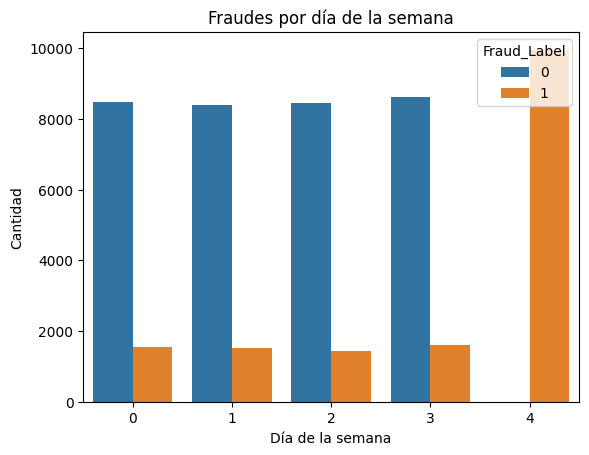

In [22]:
sns.countplot(x = "Failed_Transaction_Count_7d", hue="Fraud_Label", data=df)
plt.title("Fraudes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad")
plt.show()

In [23]:
df["Failed_Transaction_x_risk"] = df["Failed_Transaction_Count_7d"] * df["Risk_Score"]

En modelos como Árboles y Bosques Aleatorios la caracteristica "Failed_Transaction_Count_7d", causa sobreajuste, es decir, el modelo se ajusta demasiado bien a los datos de entrenamiento pero falla en datos nuevos, por ello como ambas variables("Failed_Transaction_Count_7d" y "Risk_Score") están correlacionadas con fraude, combinarlas puede mejorar la predicción.
Posteriormente se vera si se mantiene o elimina "Failed_Transaction_Count_7d".



In [24]:
df_tre = df.copy()

In [25]:
df.drop(columns=['Transaction_ID', 'User_ID'], inplace=True) #este dataFrame sera para regresion logistica

In [26]:
df_tre.drop(columns=['Transaction_ID', 'User_ID', "Failed_Transaction_Count_7d"], inplace=True) #eliminamos columnas para el dataFrame de arbol y bosque.

Se decide eliminar "Failed_Transaction_Count_7d" para modelos de arboles y bosque pues causa un gran sobreajuste, pero se mantendra para modelar regresion logistica, pues no causa sobreajuste y aporta mucho al modelo.




In [27]:
# Separar variables independientes (X) y variable objetivo (y)
x =df.drop(columns = ["Fraud_Label"])  # Todas las columnas excepto la etiqueta
y = df["Fraud_Label"] # La variable objetivo

# Dividir en 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234, stratify =y)

# Verificar tamaños
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape}")
print(f"Tamaño del conjunto de prueba: {x_test.shape}")

Tamaño del conjunto de entrenamiento: (40000, 22)
Tamaño del conjunto de prueba: (10000, 22)


Separamos los datos antes de estandarizar y escalar para los datos para regresion logistica.

In [28]:
# Separar variables independientes (X) y variable objetivo (y)
x_tre =df_tre.drop(columns = ["Fraud_Label"])  # Todas las columnas excepto la etiqueta
y_tre = df_tre["Fraud_Label"] # La variable objetivo

# Dividir en 80% entrenamiento y 20% prueba
x_traintre, x_testtre, y_traintre, y_testtre = train_test_split(x_tre, y_tre, test_size=0.2, random_state=1234, stratify =y_tre)

# Verificar tamaños
print(f"Tamaño del conjunto de entrenamiento: {x_traintre.shape}")
print(f"Tamaño del conjunto de prueba: {x_testtre.shape}")

Tamaño del conjunto de entrenamiento: (40000, 21)
Tamaño del conjunto de prueba: (10000, 21)


Separamos los datos en conjuntos para modelos de arbol y bosque.

In [29]:
# Lista de columnas categóricas a transformar
categorical_columns = ['Transaction_Type', 'Device_Type', 'Location',
                       'Merchant_Category', 'Card_Type', 'Authentication_Method']

# Aplicar One-Hot Encoding (OHE) y eliminar la primera columna de cada categoría para evitar colinealidad en modelos de regresion lineal.
x_train = pd.get_dummies(x_train, columns=categorical_columns, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_columns, drop_first=True)

# Aplicar One-Hot Encoding (OHE) para los modelos de arbol y bosque
x_traintre = pd.get_dummies(x_traintre, columns=categorical_columns, drop_first=True)
x_testtre = pd.get_dummies(x_testtre, columns=categorical_columns, drop_first=True)

Tranformamos los datos categoricos.

In [30]:
x_train["Transaction_Amount"]= np.log1p(x_train["Transaction_Amount"])#Transformamos logaritmicamente "Transaction_Amount"
x_test["Transaction_Amount"]= np.log1p(x_test["Transaction_Amount"])

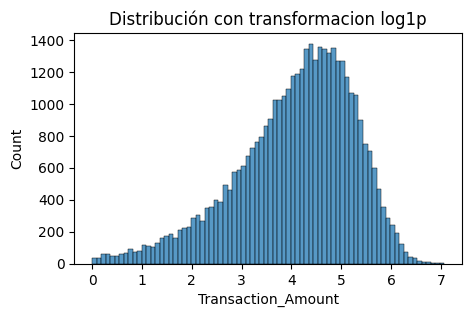

In [31]:
plt.figure(figsize=(5, 3))
sns.histplot(x_train["Transaction_Amount"])
plt.title('Distribución con transformacion log1p')
plt.show()

Aplicamos tranformacion logaritmica a "Transaction_Amount", normalizamos asi la distribucion para no ir en contra del modelo de regresion.

In [32]:
# Seleccionar columnas numéricas a escalar (excluyendo OHE y binarias)
numeric_columns = ["Transaction_Amount", "Account_Balance", "Daily_Transaction_Count",
                   "Avg_Transaction_Amount_7d","Card_Age", "Transaction_Distance",
                   "Risk_Score", "day_month", "hour", "month", "day_week","Failed_Transaction_x_risk"]

# Inicializar y aplicar StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[numeric_columns])
x_train[numeric_columns] = scaler.transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

Estandarizamos caracteristicas númericas para regresion logistica.

In [33]:
# Definir los modelos con class_weight="balanced"
log_reg = LogisticRegression(class_weight="balanced", random_state=42, max_iter=500)
tree = DecisionTreeClassifier(class_weight="balanced", random_state=42, max_depth=10)
rf = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=10, n_estimators=100)

# Entrenar los modelos
log_reg.fit(x_train, y_train)
tree.fit(x_traintre, y_traintre)
rf.fit(x_traintre, y_traintre)

# Hacer predicciones
y_pred_log_reg = log_reg.predict(x_test)
y_pred_tree = tree.predict(x_testtre)
y_pred_rf = rf.predict(x_testtre)

# Calcular probabilidades para AUC-ROC
y_prob_log_reg = log_reg.predict_proba(x_test)[:, 1]
y_prob_tree = tree.predict_proba(x_testtre)[:, 1]
y_prob_rf = rf.predict_proba(x_testtre)[:, 1]

# Función para evaluar cada modelo
def evaluar_modelo(nombre, y_test, y_pred, y_prob):
    print(f"\nEvaluación del modelo: {nombre}")
    print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall (Sensibilidad): {recall_score(y_test, y_pred):.4f}")

# Evaluar cada modelo
evaluar_modelo("Regresión Logística", y_test, y_pred_log_reg, y_prob_log_reg)
evaluar_modelo("Árbol de Decisión", y_testtre, y_pred_tree, y_prob_tree)
evaluar_modelo("Bosque Aleatorio", y_testtre, y_pred_rf, y_prob_rf)



Evaluación del modelo: Regresión Logística
Exactitud (Accuracy): 0.9761
AUC-ROC: 0.9994
F1 Score: 0.9640
Precisión: 0.9340
Recall (Sensibilidad): 0.9960

Evaluación del modelo: Árbol de Decisión
Exactitud (Accuracy): 0.9890
AUC-ROC: 0.9982
F1 Score: 0.9829
Precisión: 0.9847
Recall (Sensibilidad): 0.9810

Evaluación del modelo: Bosque Aleatorio
Exactitud (Accuracy): 0.8632
AUC-ROC: 0.9542
F1 Score: 0.7765
Precisión: 0.8173
Recall (Sensibilidad): 0.7395


## Conclusiones

✅ Modelos altamente predictivos: Se logró desarrollar modelos con alto rendimiento, destacando la Regresión Logística con una precisión del 97.61% y un AUC-ROC de 0.9994, lo que indica una excelente capacidad para diferenciar entre fraudes y transacciones legítimas.

✅ Importancia de la selección de características: Se identificó que la variable Failed_Transaction_Count_7d tenía un fuerte impacto en la predicción, pero causaba sobreajuste en modelos basados en árboles. La transformación Failed_Transaction_x_risk ayudó a mejorar el rendimiento sin comprometer la generalización.

✅ Diferencias en el tratamiento de variables por modelo:

- Regresión Logística se benefició del escalado y la transformación logarítmica de ciertas variables.

- Árboles de Decisión y Bosque Aleatorio no requerían escalado, pero sí la eliminación de Failed_Transaction_Count_7d para evitar sobreajuste.

✅ Mejor modelo recomendado: Regresión Logística demostró ser la opción más estable y precisa para la detección de fraudes, ya que equilibra precisión y recall sin riesgo de sobreajuste.

✅ Aplicabilidad real: El modelo desarrollado permite detectar fraudes en tiempo real, generar alertas automáticas y reducir pérdidas financieras causadas por actividades fraudulentas.

## Recomendaciones

📌 Integración en sistemas transaccionales: Implementar el modelo dentro de la infraestructura de la empresa para monitorear transacciones en tiempo real.

📌 Monitoreo y actualización constante: Los patrones de fraude evolucionan con el tiempo, por lo que el modelo debe ser recalibrado periódicamente con datos recientes.

📌 Exploración de modelos más avanzados: Evaluar la implementación de algoritmos como XGBoost o LightGBM para mejorar aún más la precisión sin riesgo de sobreajuste.